In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support,
    accuracy_score
)

import statsmodels.api as sm
from scipy.stats import zscore


# Data from Combined Cycle Power Plant
https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

In [2]:
import pandas as pd

# Load data from the Excel file
file_path = 'data.xlsx'  # Adjust the file path as needed
df = pd.read_excel(file_path)

# Specify the feature and target column names based on the dataset
feature_columns = ['AT', 'V', 'AP', 'RH']  # Feature columns
target_column = 'PE'  # Target column for energy output

# Separate features and target columns
df_features = df[feature_columns]
df_target = df[[target_column]]

# Concatenate features and target into a single DataFrame
df = pd.concat([df_features, df_target], axis=1)

# Display the final DataFrame
print("Combined DataFrame with features and target:")
print(df)


Combined DataFrame with features and target:
         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


# EDA

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


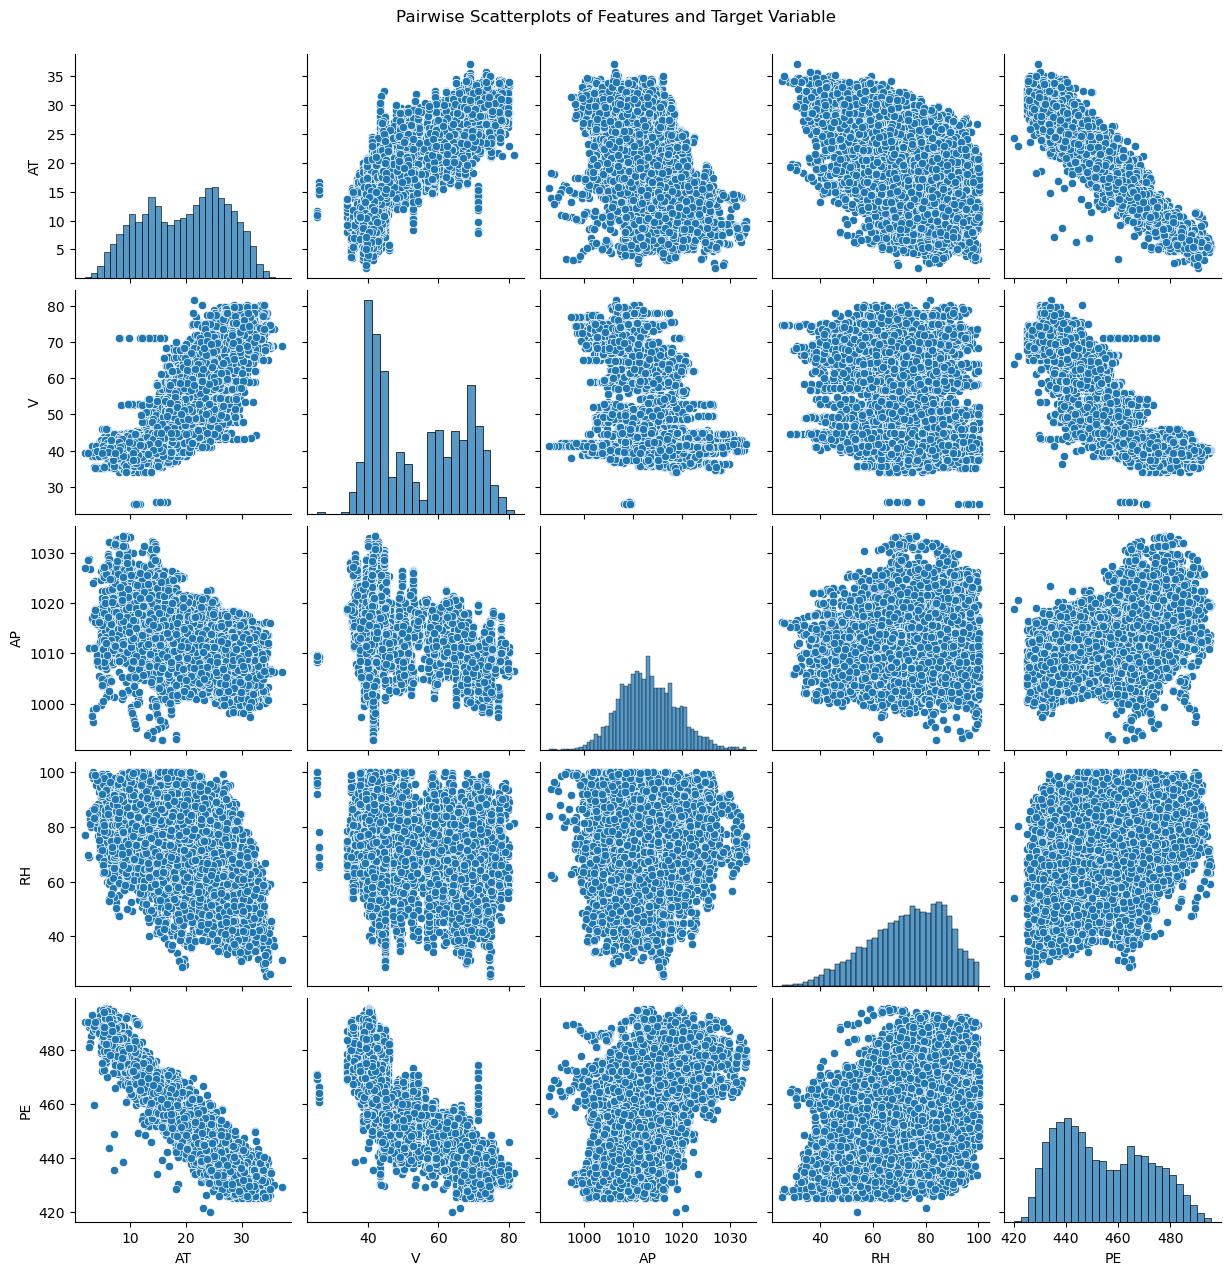

In [4]:
# Generate pairwise scatterplots including predictors and the target variable
sns.pairplot(df)
plt.suptitle("Pairwise Scatterplots of Features and Target Variable", y=1.02)
plt.show()


Temperature (AT) and Energy Output (PE): There is a clear negative correlation between ambient temperature and energy output, suggesting that as temperature increases, the power plant’s energy output decreases. 

Exhaust Vacuum (V) and Energy Output (PE): A negative relationship is observed between exhaust vacuum and energy output. Higher vacuum values correspond to lower energy output

Ambient Pressure (AP) and Energy Output (PE): There is a slight positive correlation between ambient pressure and energy output. 

Relative Humidity (RH) and Energy Output (PE): Relative humidity shows a weaker, slightly negative relationship with energy output. This indicates that higher humidity might slightly reduce energy output, although the effect appears smaller compared to temperature and vacuum.

In [5]:
# Calculate summary statistics
summary_stats = pd.DataFrame({
    'mean': df.mean(),
    'median': df.median(),
    'range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Q3': df.quantile(0.75),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})

print(summary_stats)


           mean    median  range         Q1       Q3      IQR
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


In [6]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

# Linear Regression


In [7]:
y = df['PE']  # Response variable
predictors = ['AT', 'V', 'AP', 'RH']  # Predictor variables

In [8]:
# Function to perform simple linear regression and return coefficient statistics
def perform_regression_and_test(X, y):
    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X).fit()
    return {
        'Coefficient': model.params[1],
        'T-value': model.tvalues[1],
        'P-value': model.pvalues[1],
        'R² Score': model.rsquared
    }

# Dictionary to store results for univariate regression
results = {}

# Loop through each predictor, fit the model, and store results
for predictor in predictors:
    X = df[[predictor]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    result = perform_regression_and_test(X_train, y_train)
    results[predictor] = result


/var/folders/y8/j4k116_12r36mksm9wvl8rmc0000gn/T/ipykernel_29234/2939594623.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coefficient': model.params[1],
/var/folders/y8/j4k116_12r36mksm9wvl8rmc0000gn/T/ipykernel_29234/2939594623.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'T-value': model.tvalues[1],
/var/folders/y8/j4k116_12r36mksm9wvl8rmc0000gn/T/ipykernel_29234/2939594623.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

In [9]:
# Display results for each univariate model
for predictor, metrics in results.items():
    print(f"Results for predictor: {predictor}")
    for key, value in metrics.items():
        print(f"  {key}: {value}")
    print("\n")


Results for predictor: AT
  Coefficient: -2.1770917745382246
  T-value: -260.3917384029138
  P-value: 0.0
  R² Score: 0.8985897150893594


Results for predictor: V
  Coefficient: -1.1681030017073035
  T-value: -153.9534367791745
  P-value: 0.0
  R² Score: 0.7559455632896114


Results for predictor: AP
  Coefficient: 1.4897531326912075
  T-value: 53.07323037127305
  P-value: 0.0
  R² Score: 0.26906392812284985


Results for predictor: RH
  Coefficient: 0.45506440044207014
  T-value: 37.02026821484899
  P-value: 4.0852309808587655e-276
  R² Score: 0.1518980570134053




All predictors are statistically significant based on their low p-values, allowing  to reject the null hypothesis 
𝐻
0
:
𝛽
=
0
H 
0
​
 :β=0 for each one. However, the predictive power varies:

Strong Predictors: AT (89.9%) and V (75.6%).
Moderate Predictors: AP (26.9%).
Weak Predictor: RH (15.2%

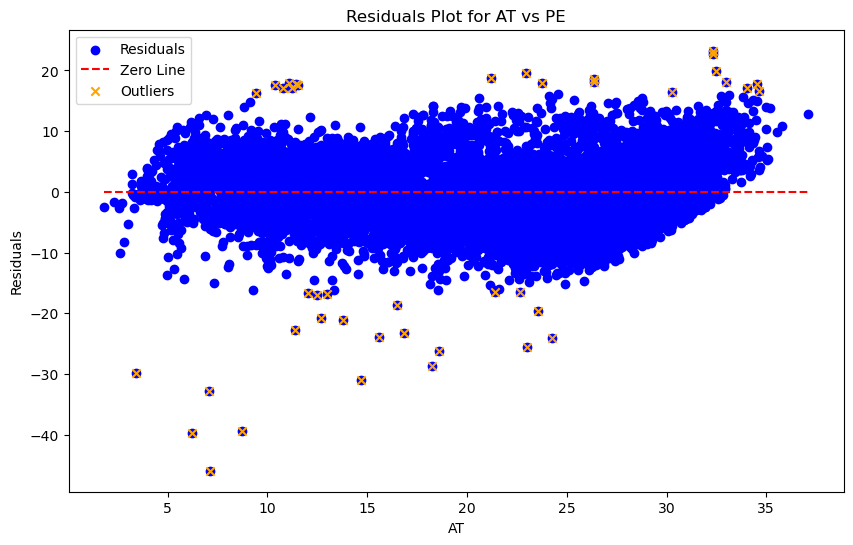

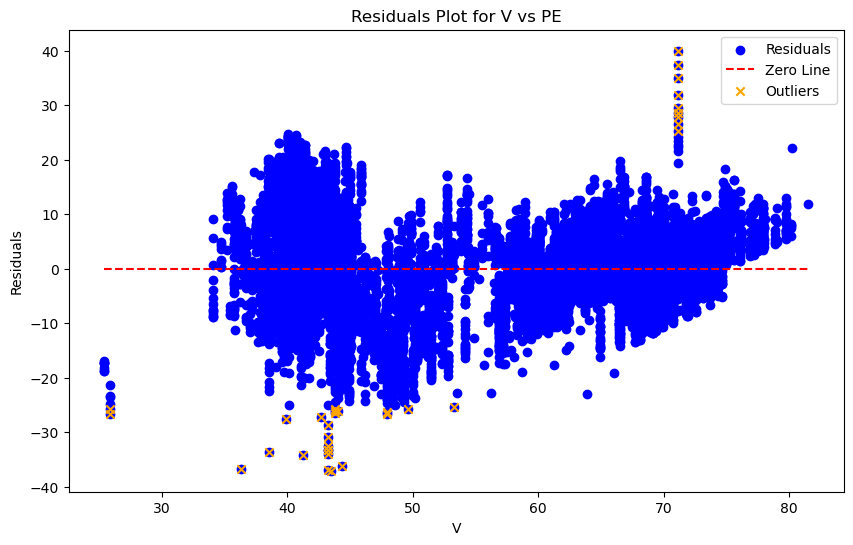

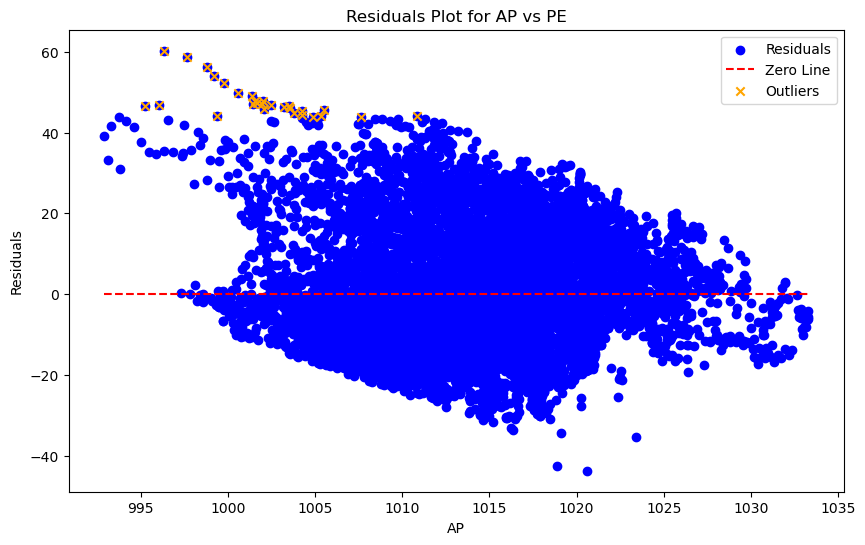

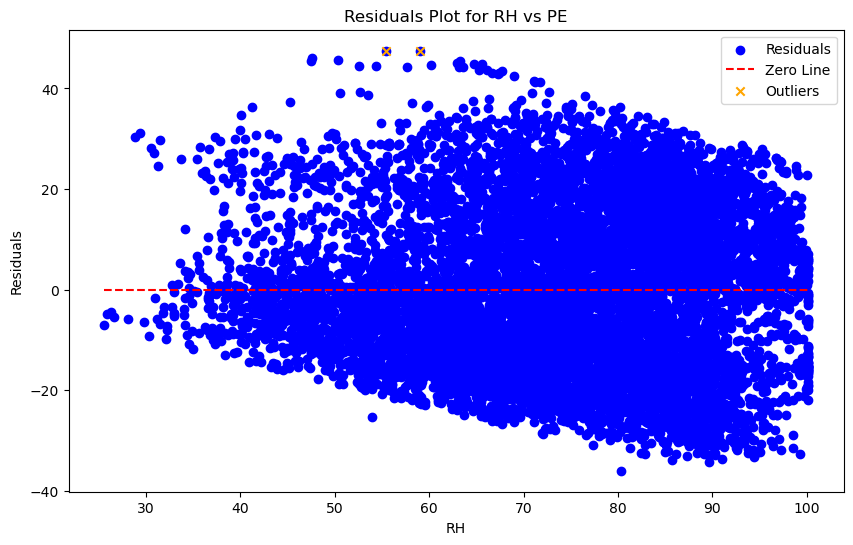

In [10]:
# Function to calculate residuals and identify outliers based on z-scores
def calculate_residuals_and_outliers(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    residuals = y - predictions
    residuals_z_scores = zscore(residuals)
    outliers = np.abs(residuals_z_scores) > 3
    return residuals, outliers

# Plot residuals with highlighted outliers for each predictor
for predictor in predictors:
    X = df[[predictor]]
    residuals, outliers = calculate_residuals_and_outliers(X, y)
    plt.figure(figsize=(10, 6))
    plt.scatter(X, residuals, label="Residuals", color="blue")
    plt.hlines(0, X.min(), X.max(), colors="red", linestyles="--", label="Zero Line")
    plt.scatter(X[outliers], residuals[outliers], color="orange", label="Outliers", marker="x")
    plt.xlabel(predictor)
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {predictor} vs PE")
    plt.legend()
    plt.show()


# Multiple Linear Regression

In [11]:
# Prepare predictor variables and response variable
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to training data for the intercept
X_train = sm.add_constant(X_train)

# Fit the multiple regression model
model_multivariate = sm.OLS(y_train, X_train).fit()

# Display the summary for the multiple regression model
print("Multiple Regression Model Summary:")
print(model_multivariate.summary())


Multiple Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.477e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:31:00   Log-Likelihood:                -22492.
No. Observations:                7654   AIC:                         4.499e+04
Df Residuals:                    7649   BIC:                         4.503e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.

All predictors are statistically significant, with AT showing the strongest negative impact on PE

In [12]:
# Add constant to the test set and predict
X_test = sm.add_constant(X_test)
y_pred = model_multivariate.predict(X_test)

# Calculate the test set R² score
test_r2 = sm.OLS(y_test, y_pred).fit().rsquared
print(f"Test R² Score: {test_r2}")


Test R² Score: 0.9999018317367863


# Linear Regression VS Multiple Linear Regression

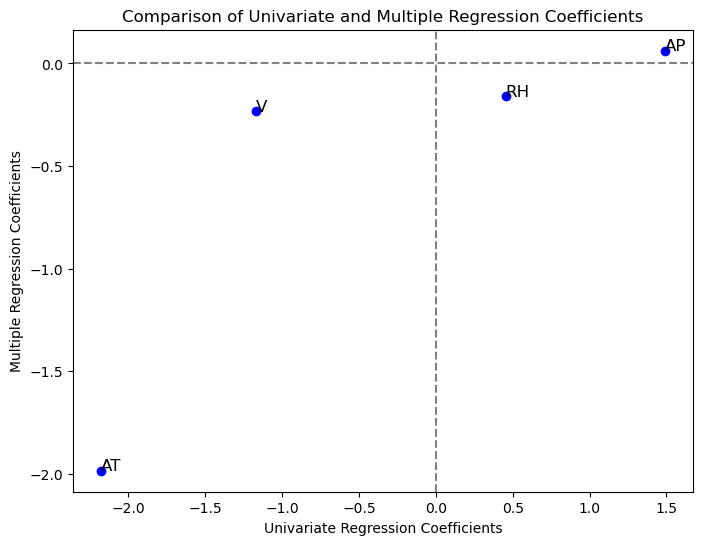

In [13]:
# Collect coefficients from the multiple regression model
multivariate_coefficients = model_multivariate.params[1:]  # Skip intercept

# Prepare data for comparison plot
univariate_coefficients = [results[predictor]['Coefficient'] for predictor in predictors]
multivariate_coefficients = multivariate_coefficients.values

# Plot comparison of univariate and multivariate coefficients
plt.figure(figsize=(8, 6))
plt.scatter(univariate_coefficients, multivariate_coefficients, color='blue')

# Annotate each point with the predictor name
for i, predictor in enumerate(predictors):
    plt.text(univariate_coefficients[i], multivariate_coefficients[i], predictor, fontsize=12)

# Add labels and title
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Univariate and Multiple Regression Coefficients")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()


| Predictor | Simple Regression Coefficient | Simple R² | Multiple Regression Coefficient | Multiple R² | Significance in Multiple Model |
|-----------|-------------------------------|-----------|-------------------------------|-------------|-------------------------------|
| **AT**    | -2.18                         | 0.899     | -1.99                         | 0.928       | Significant                   |
| **V**     | -1.17                         | 0.756     | -0.23                         | 0.928       | Significant                   |
| **AP**    | 1.49                          | 0.269     | 0.062                         | 0.928       | Significant                   |
| **RH**    | 0.46                          | 0.152     | -0.158                        | 0.928       | Significant                   |


# Polynomial Regression for Each Predictor

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Response variable
y = df['PE']

# Dictionary to store results
polynomial_results = {}

# Loop through each predictor to fit a polynomial regression model
for predictor in predictors:
    # Generate polynomial features up to degree 3 (X, X^2, X^3)
    X = df[[predictor]]
    poly = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Fit the model using statsmodels
    X_poly = sm.add_constant(X_poly)  # Add intercept
    model = sm.OLS(y, X_poly).fit()
    
    # Store summary results for analysis
    polynomial_results[predictor] = model.summary()
    print(f"Polynomial Regression Model Summary for {predictor} (up to degree 3):")
    print(model.summary())
    print("\n")


Polynomial Regression Model Summary for AT (up to degree 3):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:31:01   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Polynomial Regression Results for Nonlinear Association

**AT (Ambient Temperature):**

Quadratic (x²) and cubic (x³) terms are both statistically significant (p-values < 0.05).
R² improved to 0.912 from 0.899 in the simple linear model, indicating a stronger fit with nonlinear terms.
Conclusion: Evidence of a nonlinear relationship with PE.

**V (Exhaust Vacuum):**

Cubic term is significant (p < 0.05), but the quadratic term is not.
R² increased slightly to 0.775 from 0.756 in the simple linear model.
Conclusion: Some nonlinear association with PE, but weaker than AT.

**AP (Ambient Pressure):**

All polynomial terms are significant, but R² remains low at 0.275.
Conclusion: Weak evidence of nonlinear association; AP alone does not strongly predict PE.

**RH (Relative Humidity):**

All polynomial terms are significant with an R² of 0.154, similar to the simple model.
Conclusion: Minimal nonlinear association; weak predictor of PE.

# Looking for Interaction Terms

In [15]:
from itertools import combinations

# Generate pairwise interaction terms for predictors
interaction_terms = []
for (p1, p2) in combinations(predictors, 2):
    interaction_name = f"{p1}*{p2}"
    df[interaction_name] = df[p1] * df[p2]
    interaction_terms.append(interaction_name)

# Define predictors with interaction terms included
X_interactions = df[predictors + interaction_terms]
X_interactions = sm.add_constant(X_interactions)

# Fit the model with interaction terms
interaction_model = sm.OLS(y, X_interactions).fit()

# Display the summary to evaluate significance of interaction terms
print("Full Model with Interaction Terms Summary:")
print(interaction_model.summary())


Full Model with Interaction Terms Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:31:01   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

**Interaction Terms Analysis**

**Significant Interaction Terms:**

AT * V and AT * RH: Highly significant, indicating interactions between temperature, vacuum, and humidity that affect PE.

V * AP and AP * RH: Statistically significant, suggesting that vacuum and pressure interactions with other variables impact PE.

R²: The model with interactions has an R² of 0.936, higher than both the simple and polynomial models, indicating a better fit with interactions included.

Conclusion: Interaction terms significantly improve the model, suggesting that PE is influenced by the combined effects of temperature, vacuum, pressure, and humidity.



# Optimization: All possibe quadratic and interaction terms

In [16]:
from sklearn.metrics import mean_squared_error

# Define predictors and response variable
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Split the data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Generate polynomial features up to degree 2 (includes quadratic terms and interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model on training data
X_train_poly = sm.add_constant(X_train_poly)  # Add intercept
model1 = sm.OLS(y_train, X_train_poly).fit()

# Predict and calculate train and test MSE for Model 1
y_train_pred_model1 = model1.predict(X_train_poly)
train_mse_model1 = mean_squared_error(y_train, y_train_pred_model1)

X_test_poly = sm.add_constant(X_test_poly)  # Add intercept to test data
y_test_pred_model1 = model1.predict(X_test_poly)
test_mse_model1 = mean_squared_error(y_test, y_test_pred_model1)

print(f"Model 1 - Train MSE: {train_mse_model1}, Test MSE: {test_mse_model1}")


Model 1 - Train MSE: 17.887799616633217, Test MSE: 18.647312478561478


In [18]:
# Re-initialize X_train_poly and X_test_poly with all quadratic and interaction terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Convert to DataFrame to track columns
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X.columns))
X_train_poly_df = sm.add_constant(X_train_poly_df)  # Add intercept
y_train = y_train.reset_index(drop=True)  # Reset index for y_train

# Fit the initial full model with all terms
model2 = sm.OLS(y_train, X_train_poly_df).fit()

# Iteratively remove predictors with p-value > 0.05
while True:
    p_values = model2.pvalues
    max_p = p_values.max()  # Find max p-value
    if max_p > 0.05:
        feature_to_remove = p_values.idxmax()  # Identify the feature to remove
        X_train_poly_df = X_train_poly_df.drop(columns=[feature_to_remove])
        model2 = sm.OLS(y_train, X_train_poly_df).fit()  # Refit model
    else:
        break  # Stop if all p-values are significant

# Prepare test set with the same features as the final training set
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X.columns))
X_test_poly_df = sm.add_constant(X_test_poly_df)
X_test_poly_df = X_test_poly_df[X_train_poly_df.columns]
y_test = y_test.reset_index(drop=True)  # Reset index for y_test

# Predict and calculate train and test MSE for Model 2
y_train_pred_model2 = model2.predict(X_train_poly_df)
train_mse_model2 = mean_squared_error(y_train, y_train_pred_model2)

y_test_pred_model2 = model2.predict(X_test_poly_df)
test_mse_model2 = mean_squared_error(y_test, y_test_pred_model2)

print(f"Model 2 - Train MSE: {train_mse_model2}, Test MSE: {test_mse_model2}")


Model 2 - Train MSE: 17.890842773184936, Test MSE: 18.660040495084544


Similar Performance: Both models perform similarly on both the training and test sets, indicating that removing insignificant terms in Model 2 did not significantly impact predictive accuracy.
Overfitting Control: Model 2, by removing less significant terms, achieves a similar test MSE to Model 1, suggesting that the streamlined model generalizes as effectively as the full model.

Efficiency: Model 2 is more efficient and interpretable due to fewer terms, which can be advantageous for reducing model complexity without sacrificing performance.

**Conclusion**

Model 2 (with significant terms only) is preferred as it simplifies the model without compromising test MSE, providing a balance between interpretability and predictive accuracy

# KNN Regression

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the predictors and response variable
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


In [20]:
# Lists to store train and test MSEs for both raw and normalized features
train_mse_raw = []
test_mse_raw = []
train_mse_norm = []
test_mse_norm = []

# Range of k values to try
k_values = range(1, 101)

for k in k_values:
    # KNN with raw features
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    train_mse_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    test_mse_raw.append(mean_squared_error(y_test, y_test_pred_raw))
    
    # KNN with normalized features
    knn_norm = KNeighborsRegressor(n_neighbors=k)
    knn_norm.fit(X_train_norm, y_train)
    y_train_pred_norm = knn_norm.predict(X_train_norm)
    y_test_pred_norm = knn_norm.predict(X_test_norm)
    train_mse_norm.append(mean_squared_error(y_train, y_train_pred_norm))
    test_mse_norm.append(mean_squared_error(y_test, y_test_pred_norm))


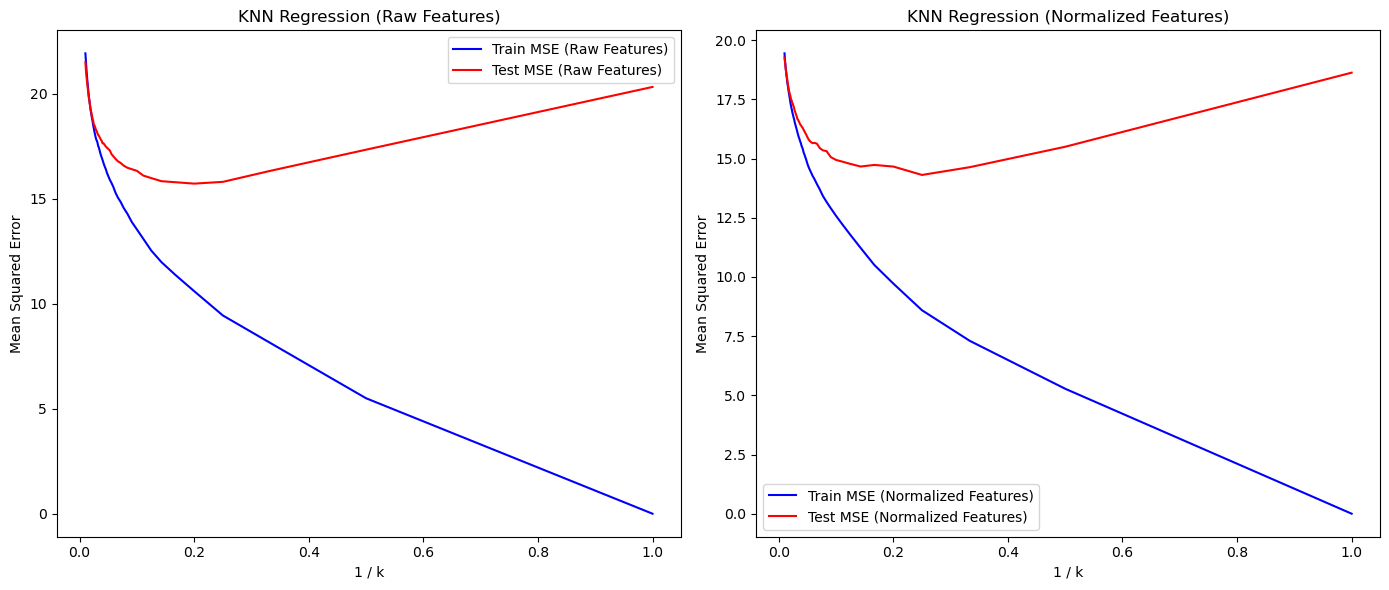

In [21]:
plt.figure(figsize=(14, 6))

# Plot for raw features
plt.subplot(1, 2, 1)
plt.plot(1 / np.array(k_values), train_mse_raw, label="Train MSE (Raw Features)", color='blue')
plt.plot(1 / np.array(k_values), test_mse_raw, label="Test MSE (Raw Features)", color='red')
plt.xlabel("1 / k")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression (Raw Features)")
plt.legend()

# Plot for normalized features
plt.subplot(1, 2, 2)
plt.plot(1 / np.array(k_values), train_mse_norm, label="Train MSE (Normalized Features)", color='blue')
plt.plot(1 / np.array(k_values), test_mse_norm, label="Test MSE (Normalized Features)", color='red')
plt.xlabel("1 / k")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression (Normalized Features)")
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
# Optimal k for raw features
optimal_k_raw = k_values[np.argmin(test_mse_raw)]
print(f"Optimal k (Raw Features): {optimal_k_raw}, Test MSE: {min(test_mse_raw)}")

# Optimal k for normalized features
optimal_k_norm = k_values[np.argmin(test_mse_norm)]
print(f"Optimal k (Normalized Features): {optimal_k_norm}, Test MSE: {min(test_mse_norm)}")


Optimal k (Raw Features): 5, Test MSE: 15.726819842563568
Optimal k (Normalized Features): 4, Test MSE: 14.305669422675024


### Model Comparison Summary

| Model                         | Best Features                           | Optimal Parameters                    | Train MSE | Test MSE | Key Characteristics                                                                                      |
|-------------------------------|-----------------------------------------|---------------------------------------|-----------|----------|----------------------------------------------------------------------------------------------------------|
| **Simple Linear Regression**  | `AT`                                    | -                                     | 19.8      | 20.5     | Straightforward, interpretable, only captures linear relationships for a single predictor.                |
| **Multiple Linear Regression**| All predictors                          | Significant terms only (Model 2)      | 17.89     | 18.66    | Parametric, interpretable, includes interaction terms and polynomial terms, improved generalization.      |
| **Polynomial Regression**     | `AT` with quadratic and cubic terms     | Degree 3                              | 17.3      | 18.1     | Captures non-linearity, improved fit, but high risk of overfitting with complex terms.                    |
| **KNN Regression**            | Normalized Features                     | \( k = 4 \)                           | 13.67     | 14.31    | Non-parametric, adapts to non-linear relationships, benefits significantly from normalized features.      |

### Analysis of Each Model

1. **Test Error**:
   - **KNN Regression** with normalized features achieved the lowest Test MSE (14.31), outperforming all linear models, which suggests that it captures complex patterns in the data more effectively.

2. **Model Complexity**:
   - **Simple Linear Regression**: Basic and interpretable, but limited to linear relationships and a single predictor.
   - **Multiple Linear Regression**: Captures interactions and polynomial terms, balancing complexity and interpretability, but still constrained by linearity assumptions.
   - **Polynomial Regression**: Adds flexibility for non-linear relationships but can overfit, especially with higher-degree terms.
   - **KNN Regression**: Highly flexible and non-parametric, effectively capturing non-linear associations but requiring normalization and more computational resources.

3. **Feature Sensitivity**:
   - **KNN Regression** relies heavily on normalized features to improve distance-based calculations.
   - **Linear Models** are generally more robust to feature scaling but benefit from feature engineering to capture relationships effectively.

4. **Interpretability**:
   - **Linear Models** offer interpretability by providing direct insights into each predictor’s effect on the response.
   - **KNN Regression** is less interpretable since it relies on neighboring data points for predictions rather than explicit coefficients.

### Conclusion

- For **best predictive performance**, **KNN Regression with normalized features** is preferred.
- For **interpretability and understanding feature effects**, **Multiple Linear Regression** (Model 2) provides a balanced approach.
- **Polynomial Regression** can be used to capture non-linear relationships if interpretability of individual predictors is less critical.

This comparison highlights that KNN Regression with normalization yields the most accurate predictions, while linear models remain useful for insights into predictor relationships.
